### Multiple inputs  graphs

Objective  : 
1. Define a more complex AgentState
2. Create a processing node that performs operations on list data
3. Setup a lang grah that processes and outputs computed results
4. Invoke the graph with structured inputs and retrive outputs

Main Goal : learn how to handle multiple inputs


In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph


In [11]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: int   


In [12]:
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    print(state)
    state["result"] = f"Hi there {state['name']}! Your Sum  =  {sum(state['values'])}"
    print(state)
    return state



In [13]:
graph = StateGraph(AgentState)
graph.set_entry_point("process list")  # set entry node
graph.add_node("process list", process_values)  # add node to the graph
graph.set_finish_point("process list")  # set finish node
app = graph.compile()  # compile the graph

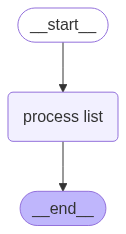

In [14]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))  # display the graph

In [15]:
result = app.invoke(AgentState( values=[1, 2, 3, 4, 5], name="Raju")) # invoke the app with initial state
result["result"]  # retrieve the result


{'values': [1, 2, 3, 4, 5], 'name': 'Raju'}
{'values': [1, 2, 3, 4, 5], 'name': 'Raju', 'result': 'Hi there Raju! Your Sum  =  15'}


'Hi there Raju! Your Sum  =  15'